In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data_meatro_cuadrado.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Habitaciones          220 non-null    int64  
 1   Baños                 220 non-null    int64  
 2   Estrato               220 non-null    int64  
 3   Área_construida       220 non-null    int64  
 4   Código inmueble       220 non-null    object 
 5   Barrio común          218 non-null    object 
 6   Precio                220 non-null    object 
 7   Antigüedad            220 non-null    object 
 8   Área construida       220 non-null    object 
 9   Área privada          220 non-null    object 
 10  Valor administración  113 non-null    object 
 11  Parqueaderos          176 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 20.8+ KB


In [83]:
data.nunique()

Habitaciones              5
Baños                     5
Estrato                   6
Área_construida         126
Código inmueble         220
Barrio común            128
Precio                  103
Antigüedad                5
Área construida         149
Área privada            145
Valor administración     78
Parqueaderos              4
dtype: int64

In [84]:
data['Estrato'].unique()

array([4, 5, 3, 2, 6, 1])

In [85]:
data['Estrato'].value_counts()

Estrato
3    79
5    67
4    58
2     9
6     4
1     3
Name: count, dtype: int64

In [2]:
df = pd.read_csv('urls_metro_cuadrado.csv')
path = 'urls_metro_cuadrado'
for i in range(2,6):
    tem = pd.read_csv(path+str(i)+'.csv')
    df = pd.concat([df,tem],ignore_index=True)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   encoded_url  244 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [5]:
df.head(10)

,encoded_url
0,/inmueble/venta-casa-tunja-frente-al-hotel-hun...
1,/inmueble/venta-casa-tunja-condominio-el-lago-...
2,/inmueble/venta-casa-tunja-tejarez-del-norte-3...
3,/inmueble/venta-casa-tunja-condominio-campestr...
4,/inmueble/venta-casa-tunja-la-maria-5-habitaci...
5,/inmueble/venta-casa-tunja-condominio-las-acac...
6,/inmueble/venta-apartamento-tunja-maria-fernan...
7,/inmueble/venta-casa-tunja-bola%C2%8Dvar-5-hab...
8,/inmueble/venta-casa-tunja-josa%C2%BF-antonio-...
9,/inmueble/venta-apartamento-tunja-gran-reserva...


In [6]:
def filtro(url):
    if 'venta-casa' in url:
        return 'venta_casa'
    elif 'venta-apartamento' in url:
        return 'venta_apartamento'

In [7]:
df['estado']= df['encoded_url'].apply(filtro)

In [15]:
df.head()

,encoded_url,estado
0,/inmueble/venta-casa-tunja-frente-al-hotel-hun...,venta_casa
1,/inmueble/venta-casa-tunja-condominio-el-lago-...,venta_casa
2,/inmueble/venta-casa-tunja-tejarez-del-norte-3...,venta_casa
3,/inmueble/venta-casa-tunja-condominio-campestr...,venta_casa
4,/inmueble/venta-casa-tunja-la-maria-5-habitaci...,venta_casa


In [11]:
df1 = pd.read_csv('urls_metro_cuadrado.csv',sep='/')
path = 'urls_metro_cuadrado'
for i in range(2,6):
    tem = pd.read_csv(path+str(i)+'.csv',sep='/')
    df1 = pd.concat([df1,tem],ignore_index=True)


In [12]:
df1.head()

,encoded_url
0,16742-M4795726
1,16742-M4795707
2,16742-M4795647
3,13873-M3706524
4,16742-M4796230


In [13]:
df.shape[0] == df1.shape[0]

True

In [19]:
df1['estado']= df['estado']
df1.head()

,encoded_url,estado
0,16742-M4795726,venta_casa
1,16742-M4795707,venta_casa
2,16742-M4795647,venta_casa
3,13873-M3706524,venta_casa
4,16742-M4796230,venta_casa


In [21]:
data['estado'] = np.NaN

In [33]:
lista_index = []
inner = 0
for i in df1['encoded_url']:
    if i in data['Código inmueble'].values:
        index= data[data['Código inmueble']==i].index
        new=df1[df1['encoded_url']==i]['estado'].values[0]
        data.loc[index,'estado']= new
    else:
        inner +=1
        

In [32]:
index,new

(Index([20], dtype='int64'),
 array(['venta_apartamento', 'venta_apartamento'], dtype=object))

In [25]:
df1[df1['encoded_url']=='16742-M4795707']['estado'].values

array(['venta_casa'], dtype=object)

In [35]:
data.tail()

,Habitaciones,Baños,Estrato,Área_construida,Código inmueble,Barrio común,Precio,Antigüedad,Área construida,Área privada,Valor administración,Parqueaderos,estado
215,3,3,5,138,MC4954891,Arboleda,$570.000.000,Entre 5 y 10 años,138.2 m²,154 m²,$358.000,2.0,venta_casa
216,4,3,4,130,MC4986469,San Ignacio,$380.000.000,Entre 10 y 20 años,130 m²,127 m²,$320.000,1.0,venta_apartamento
217,3,2,3,56,MC4990176,Arboreto,$165.000.000,Entre 5 y 10 años,56 m²,53.5 m²,$95.000,NaN,venta_apartamento
218,1,1,3,29,MC4963341,Gaitan,$125.000.000,Entre 10 y 20 años,29 m²,33 m²,$30.000,NaN,venta_apartamento
219,3,3,3,99,MC4953938,patriotas,$230.000.000,Remodelado,99.68 m²,67.5 m²,NaN,1.0,venta_casa


In [36]:
df1[df1['encoded_url']=='MC4963341']

,encoded_url,estado
222,MC4963341,venta_apartamento


In [37]:
data.to_csv('data_metro_cuadrado.csv',index=False)

In [69]:
df = pd.read_csv('urls_metro_cuadrado.csv')

In [75]:
'16742-M4795726' in 'venta-casa,16742-M4795726'

True

In [76]:
'16742-M4795726' in df.values

False

In [82]:
'16742-M4795726' in df.iloc[0].values

False

In [41]:
import csv

In [64]:
f.close()

In [38]:
data = pd.read_csv('data_metro_cuadrado.csv')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Habitaciones          220 non-null    int64  
 1   Baños                 220 non-null    int64  
 2   Estrato               220 non-null    int64  
 3   Área_construida       220 non-null    int64  
 4   Código inmueble       220 non-null    object 
 5   Barrio común          218 non-null    object 
 6   Precio                220 non-null    object 
 7   Antigüedad            220 non-null    object 
 8   Área construida       220 non-null    object 
 9   Área privada          220 non-null    object 
 10  Valor administración  113 non-null    object 
 11  Parqueaderos          176 non-null    float64
 12  estado                211 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 22.5+ KB


In [50]:
data[data['estado']==np.NAN]

,Habitaciones,Baños,Estrato,Área_construida,Código inmueble,Barrio común,Precio,Antigüedad,Área construida,Área privada,Valor administración,Parqueaderos,estado


In [43]:
data['estado'].unique()

array(['venta_casa', 'venta_apartamento', nan], dtype=object)

In [58]:
A=pd.crosstab(data['estado'],columns='count')
A

col_0,count
estado,
venta_apartamento,107
venta_casa,104


<Axes: xlabel='estado'>

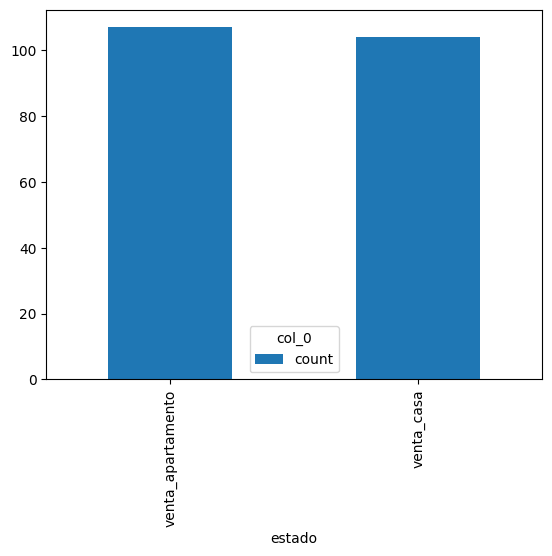

In [59]:
A.plot(kind='bar')